## gridcell_area_cartopy

Plotting grid and grid-cell area of MPIOM in LR and HR using Cartopy

### Usual Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mplcol
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import xarray as xr
import numpy as np

/work/uo1075/u241292/conda_envs/py37/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/work/uo1075/u241292/conda_envs/py37/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


### Load MPIOM data

In [12]:
file_lr='GR15L40_fx_area_60N.nc'
ds=xr.open_dataset(file_lr,decode_times=False)
area=ds['area'].values
area=np.squeeze(area)
lat=ds['lat'].values
lon=ds['lon'].values
factor=1/1000000

### pcolormesh?

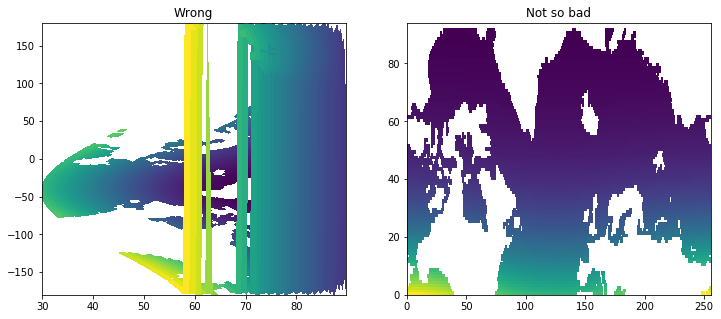

In [19]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
plt.pcolormesh(lat,lon,area)
plt.title('Wrong')

ax = fig.add_subplot(1,2,2)
plt.pcolormesh(np.flip(area,0))
plt.title('Not so bad')
plt.show()

### Full work-around

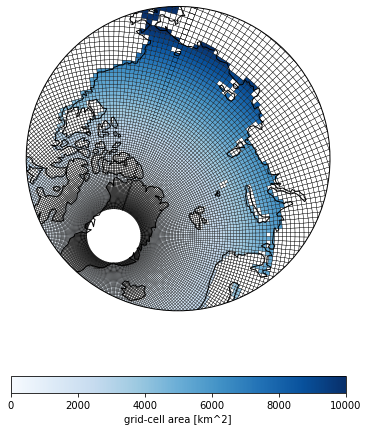

In [11]:
def circlemap():
    import numpy as np
    import matplotlib.path as mpath
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    return circle

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111,projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 63, 90], crs=ccrs.PlateCarree())
ax.coastlines()
circle=circlemap()
ax.set_boundary(circle, transform=ax.transAxes)

mesh = ax.pcolormesh(lon, lat, area*factor, cmap='Blues',
                     transform=ccrs.PlateCarree(),
                     vmin=0, vmax=10000,
                     antialiased=True, edgecolor='k', linewidth=0.3)
plt.colorbar(mesh, orientation='horizontal', shrink=0.75,label='grid-cell area [km^2]')

plt.show()